In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
# torch comes with a dataset and torchvision is focused on vision datasets
# in ML we are always going to have 2 datasets: 
# a TRAINING one and a TESTING one 
# it is very important we separate them, beacuse if we trully want to test that
# we "learned" something, we have to test is on new never seen before data.

train = datasets.MNIST("", train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False , download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))



In [3]:
# our training dataset
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
# our testing dataset
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)
# batch_size - how many do we want to pass to our model (the sweet spot 8-64)
# some people tend to go with the biggest batch_size possible, because it makes
# training faster
# shuffle - it's better because it helps with generalization


In [8]:
for data in trainset:
    print(data)
    break
# data contains a Tensor of Tensors that are your images and fater that a Tensor
# of Tensors that are the labels

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]
print(y)

tensor(6)


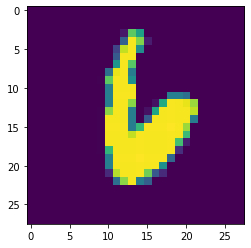

In [15]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view([28,28]))

In [14]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [18]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

# iterate through the dataset and count the number of each numbers
for data in trainset:
    Xs, Ys = data
    for y in Ys: 
        counter_dict[int(y)] += 1
        total+=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [20]:
# create procentages to see the ratio of the dataset
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
